In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/Mini_Project/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/Mini_Project/sign_mnist_test.csv')

train_df.head()

Mounted at /content/drive


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

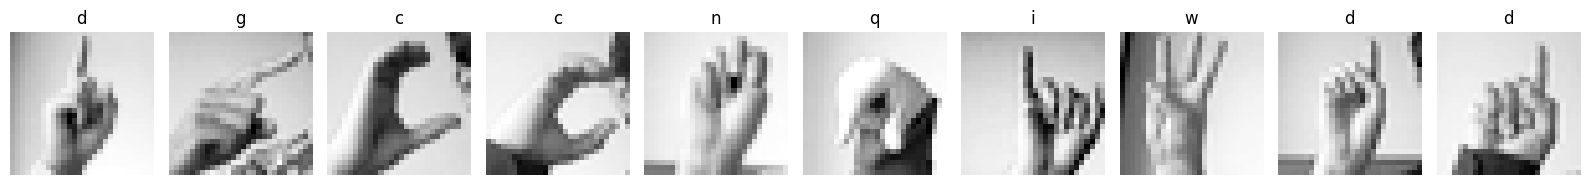

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

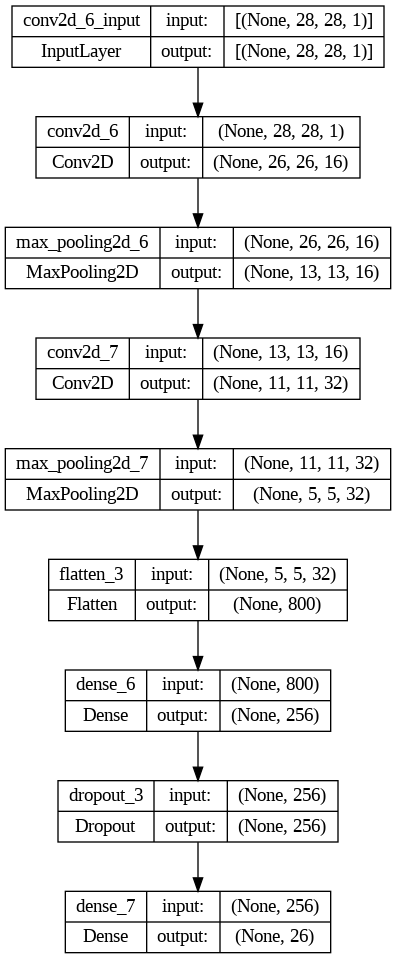

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your defined CNN model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
858/858 [==============================] - 28s 32ms/step - loss: 2.3658 - accuracy: 0.2811 - val_loss: 1.0256 - val_accuracy: 0.6857
Epoch 2/10
858/858 [==============================] - 28s 33ms/step - loss: 1.2955 - accuracy: 0.5775 - val_loss: 0.7008 - val_accuracy: 0.7649
Epoch 3/10
858/858 [==============================] - 27s 32ms/step - loss: 0.9352 - accuracy: 0.6916 - val_loss: 0.6527 - val_accuracy: 0.7883
Epoch 4/10
858/858 [==============================] - 28s 32ms/step - loss: 0.7628 - accuracy: 0.7446 - val_loss: 0.3772 - val_accuracy: 0.8634
Epoch 5/10
858/858 [==============================] - 26s 31ms/step - loss: 0.6246 - accuracy: 0.7910 - val_loss: 0.2209 - val_accuracy: 0.9350
Epoch 6/10
858/858 [==============================] - 29s 34ms/step - loss: 0.5370 - accuracy: 0.8187 - val_loss: 0.2245 - val_accuracy: 0.9191
Epoch 7/10
858/858 [==============================] - 27s 32ms/step - loss: 0.4771 - accuracy: 0.8385 - val_loss: 0.1734 - val_accuracy:

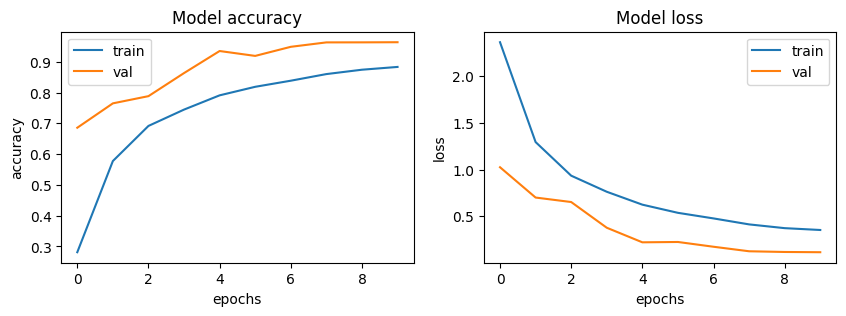

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])